## Binary class Classification using logistic regression and random forest

#### Problem Statement :- Here we have to predict the employee wolud left the company or not  based on other independent Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("C:\\Users\\Hp\\Downloads/hr_data.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


It is the Classification Problem.( Either Yes or No )

In [3]:
# Head function used to see how our data looks like
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# last 5 records 
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
# To see how many rows and columns are present in dataframe
data.shape

(14999, 10)

In [6]:
# To see which columns are present in dataframe 
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
len(data.columns)

10

In [8]:
# To see duplicated values
data.duplicated().sum()

3008

In [11]:
# Removing duplicates
data.drop_duplicates(inplace = True)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [12]:
# To see is there any null value
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There is no null value in our dataframe

In [13]:
# Info function dtypes of the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [14]:
# describe gives Statistical information about the numeric variables
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
# To visualise properly use transverse function
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


In [16]:
# To find out how many unique values are there in each columns
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [17]:
# To find out which unique values present a particular column
data['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [18]:
data['number_project'].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


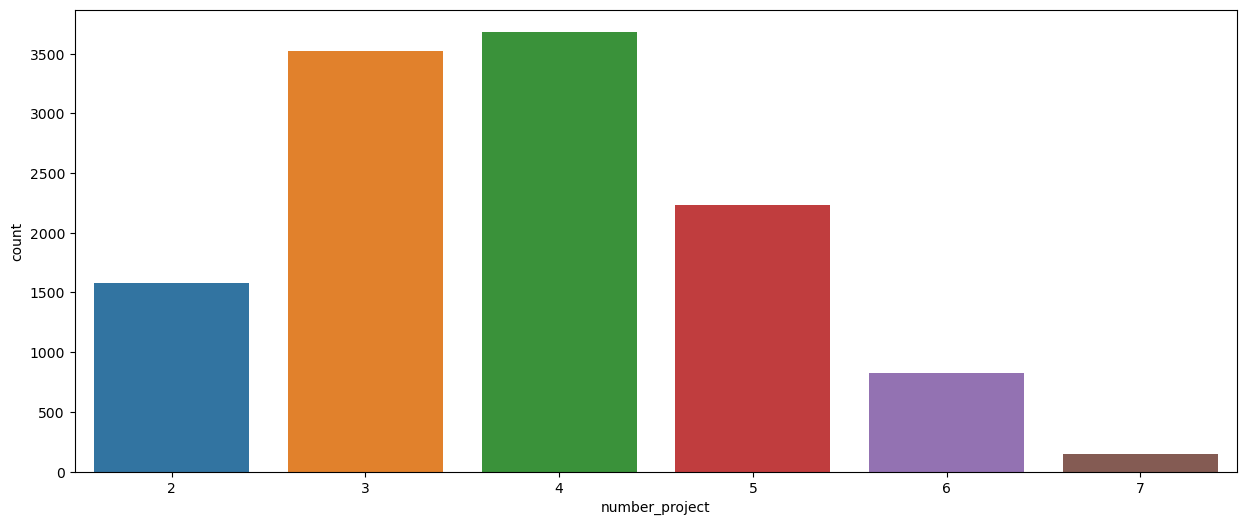

In [19]:
plt.figure(figsize= (15,6))
sns.countplot(data.number_project)
plt.show()

In [20]:
data['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [21]:
data['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


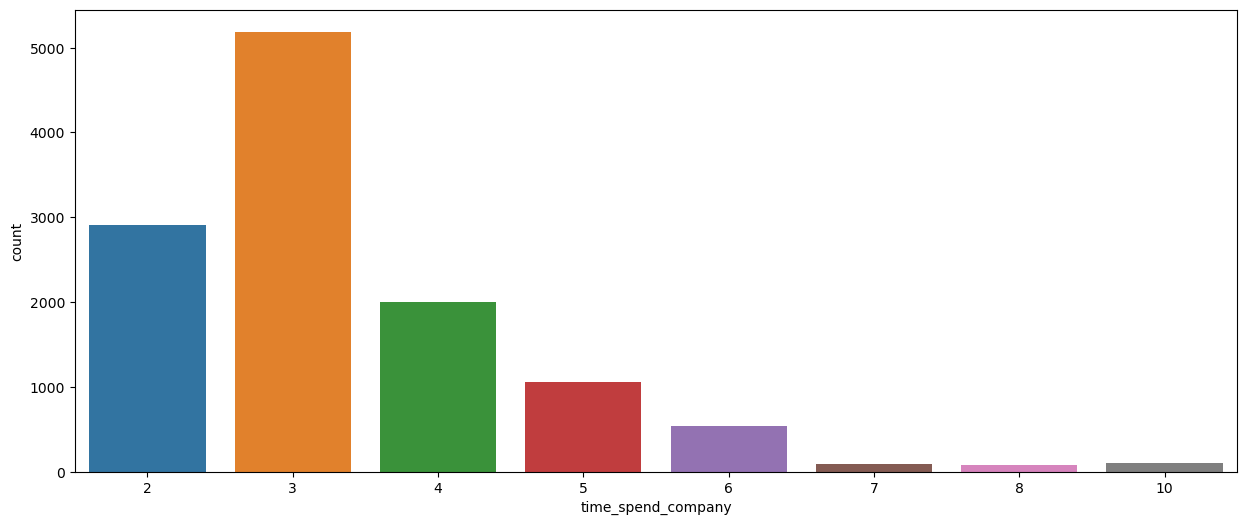

In [22]:
plt.figure(figsize= (15,6))
sns.countplot(data.time_spend_company)
plt.show()

In [23]:
data['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [24]:
data['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

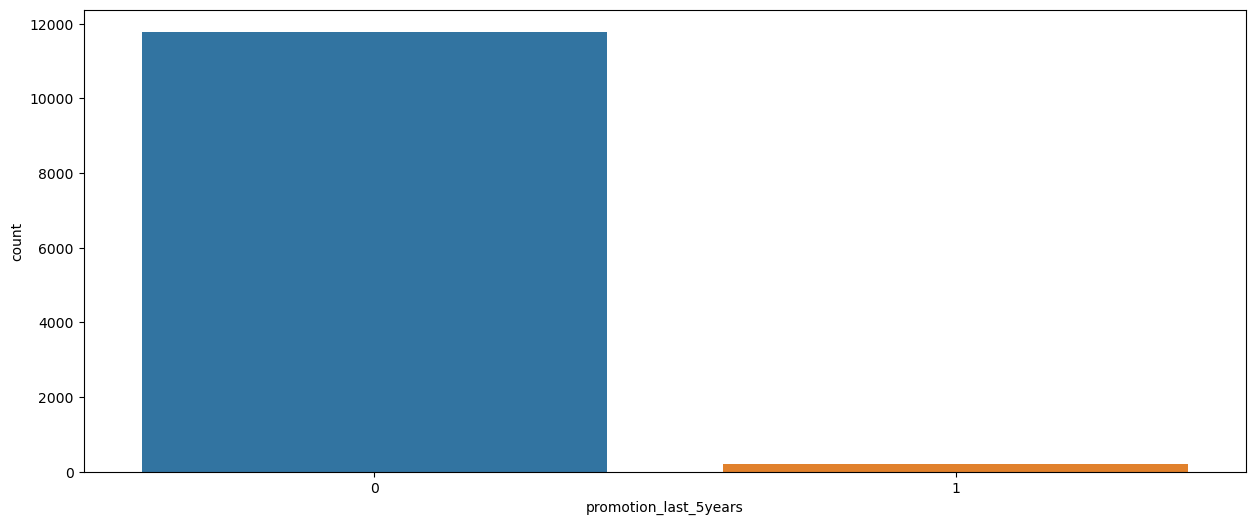

In [25]:
plt.figure(figsize= (15,6))
sns.countplot(data.promotion_last_5years)
plt.show

In [26]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [27]:
data['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

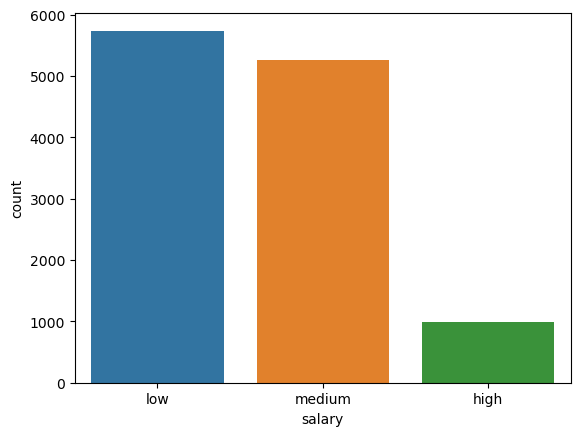

In [28]:
sns.countplot(x='salary', data = data)

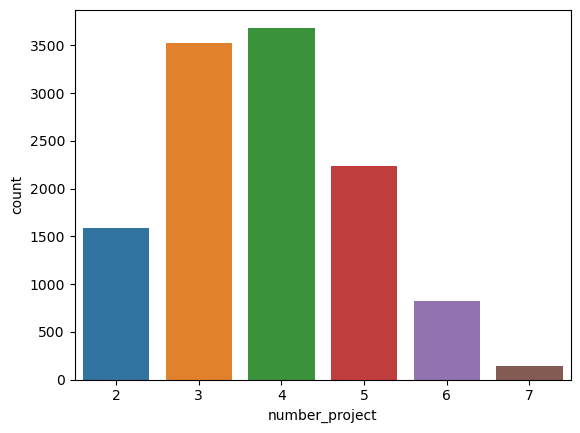

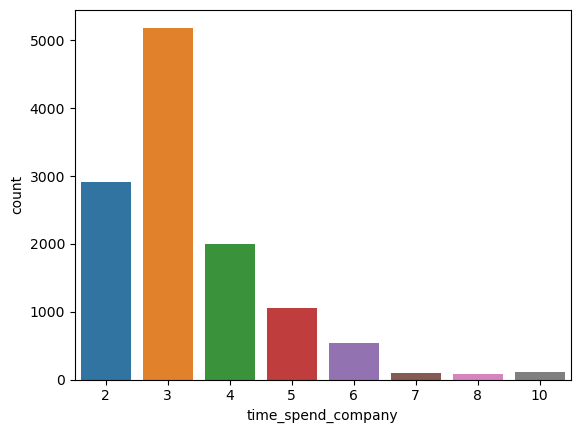

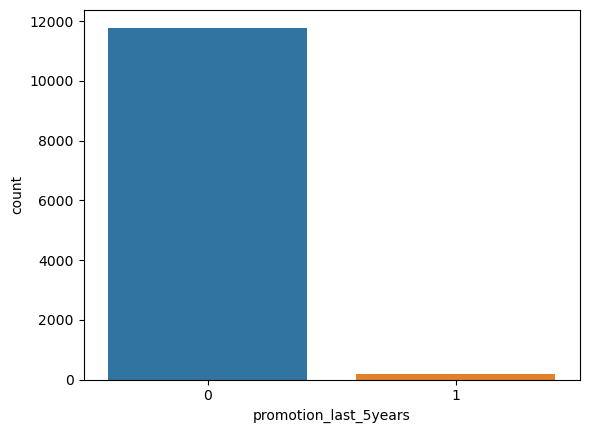

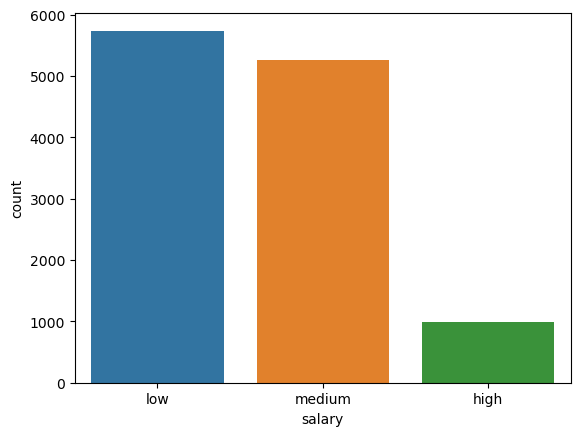

In [31]:
# Alternate method
#ploting all graphs using for loop
for i in ["number_project", "time_spend_company", "promotion_last_5years", "salary"]:
    sns.countplot(data=data,x=i)
    plt.show()

In [33]:
# Convert cetogorical variable into numarical variable
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=lab.fit_transform(data[i])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,0
11996,0.74,0.95,5,266,10,0,0,1,4,0
11997,0.85,0.54,3,185,10,0,0,1,4,0
11998,0.33,0.65,3,172,10,0,0,1,5,0


In [35]:
# Dividing the data in x and y
x=data.drop("left",axis=1)
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0
11996,0.74,0.95,5,266,10,0,1,4,0
11997,0.85,0.54,3,185,10,0,1,4,0
11998,0.33,0.65,3,172,10,0,1,5,0


In [68]:
# Standardization
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X=sta.fit_transform(x)
X

array([[-1.03566801, -1.10899046, -1.54992118, ..., -0.13122844,
         0.38940495, -0.56713086],
       [ 0.70663718,  0.85137984,  1.02919412, ..., -0.13122844,
         0.38940495,  1.02511128],
       [-2.15572134,  0.97019016,  2.74860432, ..., -0.13122844,
         0.38940495,  1.02511128],
       ...,
       [ 0.91405447, -1.0495853 , -0.69021608, ...,  7.62029957,
        -0.64546978, -2.15937301],
       [-1.24308529, -0.39612853, -0.69021608, ...,  7.62029957,
        -0.30051154, -2.15937301],
       [-0.53786652,  0.07911275,  0.16948902, ..., -0.13122844,
        -2.02530276, -0.56713086]])

In [37]:
y=data["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [47]:
# Spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=20,train_size=.80)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9592, 9), (2399, 9), (9592,), (2399,))

In [48]:
# Fitting the model in logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
# checking the scrore of train data
lr.score(x_train,y_train)

0.8342368640533778

In [50]:
# Checking the score of test data
lr.score(x_test,y_test)

0.830762817840767

In [51]:
# Accuracy check by Accuracy score
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test,lr.predict(x_test))))

Logistic regression accuracy: 0.831


In [52]:
# Predicting y
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# Making confusion metrics
from sklearn.metrics import confusion_matrix
lr_cm=confusion_matrix(y_pred,y_test)
lr_cm

array([[1992,   38],
       [   3,  366]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression')

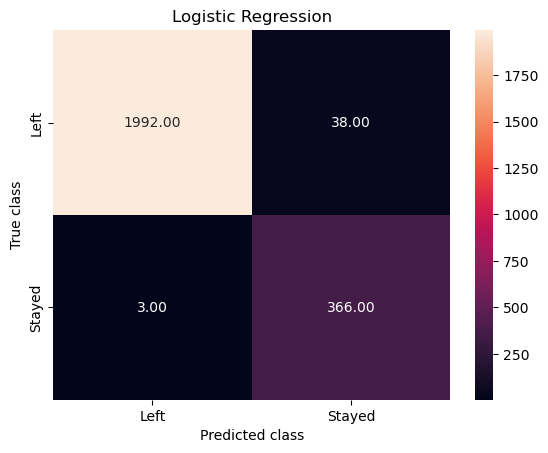

In [62]:
# Ploting confusion metrics
sns.heatmap(lr_cm, annot=True, fmt='.2f',
xticklabels = ["Left", "Stayed"] ,
yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
print('Random Forest Accuracy : {:.3f}'.format(accuracy_score(y_test,rf.predict(x_test))))

Random Forest Accuracy : 0.982


In [66]:
# Making confusion metrics
from sklearn.metrics import confusion_matrix
rf_cm=confusion_matrix(y_pred,y_test)
rf_cm

array([[1992,   40],
       [   3,  364]], dtype=int64)

Text(0.5, 1.0, 'Random Forest')

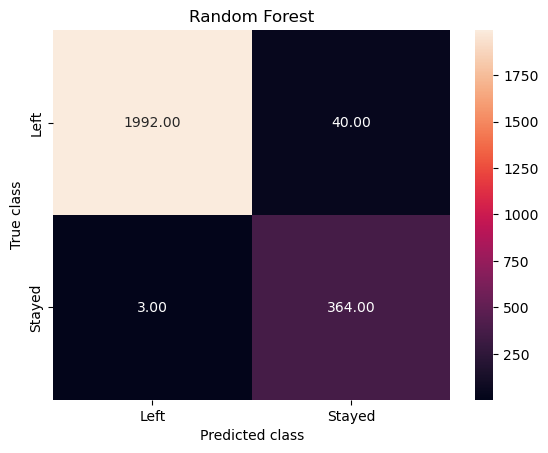

In [67]:
# Ploting confusion metrics
sns.heatmap(rf_cm, annot=True, fmt='.2f',
xticklabels = ["Left", "Stayed"] ,
yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

#### Conclusion :-

From above results we can see that in random forest there is a approximately 98% accuracy so that we can finalise these model
and also there is no overfiting problem.